In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot  as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Documents/transactions.csv")

In [3]:
data.head()

,Transaction ID,Timestamp,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR),Status
0,4d3db980-46cd-4158-a812-dcb77055d0d2,2024-06-22 04:06:38,Tiya Mall,4161803452@okaxis,Mohanlal Golla,7776849307@okybl,3907.34,FAILED
1,099ee548-2fc1-4811-bf92-559c467ca792,2024-06-19 06:04:49,Mohanlal Bakshi,8908837379@okaxis,Mehul Sankaran,7683454560@okaxis,8404.55,SUCCESS
2,d4c05732-6b1b-4bab-90b9-efe09d252b99,2024-06-04 04:56:09,Kismat Bora,4633654150@okybl,Diya Goel,2598130823@okicici,941.88,SUCCESS
3,e8df92ee-8b04-4133-af5a-5f412180c8ab,2024-06-09 09:56:07,Ayesha Korpal,7018842771@okhdfcbank,Rhea Kothari,2246623650@okaxis,8926.00,SUCCESS
4,e7d675d3-04f1-419c-a841-7a04662560b7,2024-06-25 08:38:19,Jivin Batta,1977143985@okybl,Baiju Issac,5245672729@okybl,2800.55,SUCCESS


In [4]:
data.drop("Transaction ID",axis=1,inplace=True)

In [5]:
data.shape

(1000, 7)

In [6]:
data.nunique()

Timestamp          1000
Sender Name         997
Sender UPI ID      1000
Receiver Name       996
Receiver UPI ID    1000
Amount (INR)        999
Status                2
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        1000 non-null   object 
 1   Sender Name      1000 non-null   object 
 2   Sender UPI ID    1000 non-null   object 
 3   Receiver Name    1000 non-null   object 
 4   Receiver UPI ID  1000 non-null   object 
 5   Amount (INR)     1000 non-null   float64
 6   Status           1000 non-null   object 
dtypes: float64(1), object(6)
memory usage: 54.8+ KB


In [8]:
data.isnull().sum()

Timestamp          0
Sender Name        0
Sender UPI ID      0
Receiver Name      0
Receiver UPI ID    0
Amount (INR)       0
Status             0
dtype: int64

In [9]:
data["Sender Name"].value_counts==2

False

In [10]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        1000 non-null   datetime64[ns]
 1   Sender Name      1000 non-null   object        
 2   Sender UPI ID    1000 non-null   object        
 3   Receiver Name    1000 non-null   object        
 4   Receiver UPI ID  1000 non-null   object        
 5   Amount (INR)     1000 non-null   float64       
 6   Status           1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 54.8+ KB


In [12]:
topsender  = data["Sender Name"].value_counts().head(3)

In [13]:
topsender

Prerak Lanka     2
Aayush Bakshi    2
Ivan Ramesh      2
Name: Sender Name, dtype: int64

In [14]:
topreceiver =  data["Receiver Name"].value_counts().head(4)
print(topreceiver)

Purab Gandhi      2
Tarini Anand      2
Ryan Varughese    2
Samarth Gala      2
Name: Receiver Name, dtype: int64


In [15]:
data[data["Sender Name"]=="Prerak Lanka"]

,Timestamp,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR),Status
241,2024-06-21 05:12:15,Prerak Lanka,1013933291@okhdfcbank,Jayan Bedi,5826134954@okybl,4245.79,SUCCESS
610,2024-07-02 17:22:46,Prerak Lanka,1943928738@okaxis,Alisha Dara,7065501652@okybl,1475.17,SUCCESS


In [16]:
data[data["Receiver Name"]=="Tarini Anand"]

,Timestamp,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR),Status
324,2024-06-23 16:56:48,Ritvik Bassi,9932809090@okybl,Tarini Anand,3237592515@okicici,929.96,SUCCESS
935,2024-06-10 20:37:17,Rasha Lala,2820264046@okicici,Tarini Anand,4469822354@okicici,9636.95,FAILED


In [17]:
data.head(5)

,Timestamp,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR),Status
0,2024-06-22 04:06:38,Tiya Mall,4161803452@okaxis,Mohanlal Golla,7776849307@okybl,3907.34,FAILED
1,2024-06-19 06:04:49,Mohanlal Bakshi,8908837379@okaxis,Mehul Sankaran,7683454560@okaxis,8404.55,SUCCESS
2,2024-06-04 04:56:09,Kismat Bora,4633654150@okybl,Diya Goel,2598130823@okicici,941.88,SUCCESS
3,2024-06-09 09:56:07,Ayesha Korpal,7018842771@okhdfcbank,Rhea Kothari,2246623650@okaxis,8926.00,SUCCESS
4,2024-06-25 08:38:19,Jivin Batta,1977143985@okybl,Baiju Issac,5245672729@okybl,2800.55,SUCCESS


In [18]:
data["year"]= data["Timestamp"].dt.year

In [19]:
data["month"]= data["Timestamp"].dt.month

In [20]:
data["day"]= data["Timestamp"].dt.day

In [21]:
data

,Timestamp,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR),Status,year,month,day
0,2024-06-22 04:06:38,Tiya Mall,4161803452@okaxis,Mohanlal Golla,7776849307@okybl,3907.34,FAILED,2024,6,22
1,2024-06-19 06:04:49,Mohanlal Bakshi,8908837379@okaxis,Mehul Sankaran,7683454560@okaxis,8404.55,SUCCESS,2024,6,19
2,2024-06-04 04:56:09,Kismat Bora,4633654150@okybl,Diya Goel,2598130823@okicici,941.88,SUCCESS,2024,6,4
3,2024-06-09 09:56:07,Ayesha Korpal,7018842771@okhdfcbank,Rhea Kothari,2246623650@okaxis,8926.00,SUCCESS,2024,6,9
4,2024-06-25 08:38:19,Jivin Batta,1977143985@okybl,Baiju Issac,5245672729@okybl,2800.55,SUCCESS,2024,6,25
...,...,...,...,...,...,...,...,...,...,...
995,2024-07-03 23:15:06,Anay Karan,7041132054@okhdfcbank,Dhanush Salvi,7858014473@okicici,9270.15,SUCCESS,2024,7,3
996,2024-06-15 15:42:57,Nirvaan Aurora,1200592114@okybl,Faiyaz Kara,2795494339@okhdfcbank,2278.32,FAILED,2024,6,15
997,2024-06-18 17:27:37,Bhamini Srinivasan,6922445535@okicici,Mishti Kala,5207563362@okybl,4857.89,FAILED,2024,6,18
998,2024-06-05 21:57:36,Krish Kohli,4638471232@okhdfcbank,Sahil Bail,9348631179@okaxis,9475.68,FAILED,2024,6,5


In [22]:
data.drop(columns=["Timestamp","Sender Name","Sender UPI ID","Receiver Name","Receiver UPI ID"],axis=1,inplace=True)

In [23]:
data.head()

,Amount (INR),Status,year,month,day
0,3907.34,FAILED,2024,6,22
1,8404.55,SUCCESS,2024,6,19
2,941.88,SUCCESS,2024,6,4
3,8926.00,SUCCESS,2024,6,9
4,2800.55,SUCCESS,2024,6,25


In [24]:
data["Status"]=data["Status"].apply(lambda x : 0 if x == "FAILED" else 1)

In [25]:
data.head(5)

,Amount (INR),Status,year,month,day
0,3907.34,0,2024,6,22
1,8404.55,1,2024,6,19
2,941.88,1,2024,6,4
3,8926.00,1,2024,6,9
4,2800.55,1,2024,6,25


In [26]:
data["month"].value_counts()

6    892
7    108
Name: month, dtype: int64

<Axes: xlabel='month', ylabel='count'>

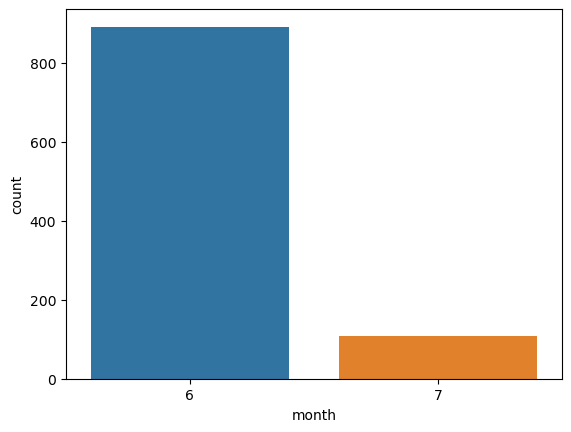

In [27]:
sns.countplot(data=data,x="month")

In [28]:
gro_mon = data.groupby("month",as_index = False)["Amount (INR)"].sum()

In [29]:
gro_mon

,month,Amount (INR)
0,6,4466815.76
1,7,532207.17


<Axes: xlabel='month', ylabel='Amount (INR)'>

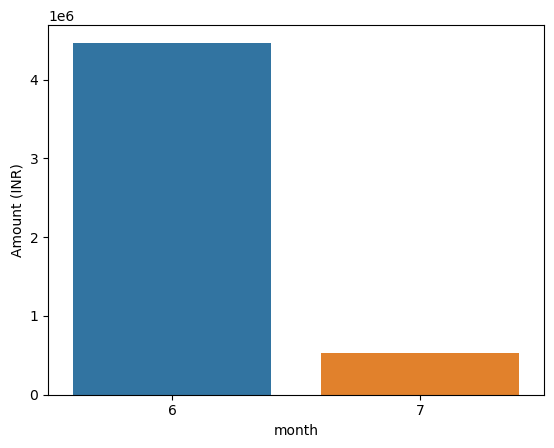

In [30]:
sns.barplot(data=gro_mon,x = "month",y ="Amount (INR)")

In [31]:
data.head()

,Amount (INR),Status,year,month,day
0,3907.34,0,2024,6,22
1,8404.55,1,2024,6,19
2,941.88,1,2024,6,4
3,8926.00,1,2024,6,9
4,2800.55,1,2024,6,25


In [32]:
x=data.drop("Status",axis=1)
y=data["Status"]

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x,y)
print(gbc.feature_importances_)

[7.98964416e-01 0.00000000e+00 7.93028356e-06 2.01027654e-01]


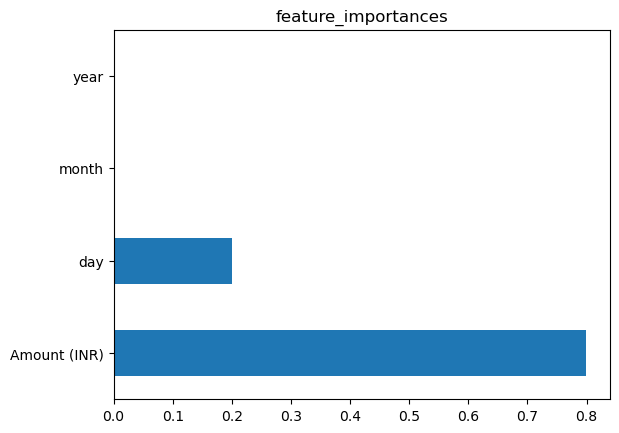

In [35]:
vis = pd.Series(gbc.feature_importances_,index=x.columns)
vis.nlargest(20).plot(kind='barh')
plt.title("feature_importances")
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)